<a href="https://colab.research.google.com/github/Iqrajahan/Music_Genre_Classification_Using_Transformer_Model/blob/main/GenreClassificationTranformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Music Genre Classification using Transformer Model</h1>

Installing the required packages


In [1]:
pip install torch torchvision torchaudio transformers scikit-learn


In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set the style for seaborn
sns.set(style='whitegrid')

In [4]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, precision_score, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset
#from sklearn.preprocessing import StandardScaler

Loading the dataset &

Performing Exploratory data Analysis

In [5]:
# Load the dataset
file_path = '/content/drive/MyDrive/Iqra Resumes/features_30_sec.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516        

In [ ]:
print(data.columns.tolist())

['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']


In [ ]:
# Check the shape and info of the dataset
print(f"Dataset Shape: {data.shape}")
print(data.info())

Dataset Shape: (1000, 60)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14 

Checking for the null values

In [ ]:
data.isnull()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  rms_var  \
0       False   False             False            False     False    False   
1       False   False             False            False     False    False   
2       False   False             False            False     False    False   
3       False   False             False            False     False    False   
4       False   False             False            False     False    False   
..        ...     ...               ...              ...       ...      ...   
995     False   False             False            False     False    False   
996     False   False             False            False     False    False   
997     False   False             False            False     False    False   
998     False   False             False            False     False    False   
999     False   False             False            False     False    False   

     spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                     False                  False                    False   
1                     False                  False                    False   
2                     False                  False                    False   
3                     False                  False                    False   
4                     False                  False                    False   
..                      ...                    ...                      ...   
995                   False                  False                    False   
996                   False                  False                    False   
997                   False                  False                    False   
998                   False                  False                    False   
999                   False                  False                    False   

     spectral_bandwidth_var  ...  mfcc16_var  mfcc17_mean  mfcc17_var  \
0                     False  ...       False        False       False   
1                     False  ...       False        False       False   
2                     False  ...       False        False       False   
3                     False  ...       False        False       False   
4                     False  ...       False        False       False   
..                      ...  ...         ...          ...         ...   
995                   False  ...       False        False       False   
996                   False  ...       False        False       False   
997                   False  ...       False        False       False   
998                   False  ...       False        False       False   
999                   False  ...       False        False       False   

     mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0          False       False        False       False        False   
1          False       False        False       False        False   
2          False       False        False       False        False   
3          False       False        False       False        False   
4          False       False        False       False        False   
..           ...         ...          ...         ...          ...   
995        False       False        False       False        False   
996        False       False        False       False        False   
997        False       False        False       False        False   
998        False       False        False       False        False   
999        False       False        False       False        False   

     mfcc20_var  label  
0         False  False  
1         False  False  
2         False  False  
3         False  False  
4         False  False  
..          ...    ...  
995       False  False  
996       False  False  
997       False  False  
998       False  False  
999       False  False  

[1000 rows x 60 columns]

In [ ]:
missing_values= data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


Descriptive statics

In [ ]:
data.describe().T

count          mean           std           min  \
length                   1000.0  6.620308e+05  1.784074e+03  6.600000e+05   
chroma_stft_mean         1000.0  3.786817e-01  8.170489e-02  1.719392e-01   
chroma_stft_var          1000.0  8.633982e-02  7.735298e-03  4.455525e-02   
rms_mean                 1000.0  1.309297e-01  6.568311e-02  5.276444e-03   
rms_var                  1000.0  3.051399e-03  3.634500e-03  4.294372e-06   
spectral_centroid_mean   1000.0  2.201781e+03  7.159606e+02  5.700404e+02   
spectral_centroid_var    1000.0  4.696916e+05  4.008995e+05  7.911251e+03   
spectral_bandwidth_mean  1000.0  2.242541e+03  5.263165e+02  8.980662e+02   
spectral_bandwidth_var   1000.0  1.370792e+05  9.645567e+04  1.078719e+04   
rolloff_mean             1000.0  4.571549e+03  1.574792e+03  7.491406e+02   
rolloff_var              1000.0  1.844345e+06  1.425085e+06  1.468612e+04   
zero_crossing_rate_mean  1000.0  1.036123e-01  4.182089e-02  2.169698e-02   
zero_crossing_rate_var   1000.0  2.986150e-03  3.023513e-03  4.408679e-05   
harmony_mean             1000.0 -3.659332e-04  1.683946e-03 -2.606458e-02   
harmony_var              1000.0  1.253999e-02  1.165332e-02  4.946464e-05   
perceptr_mean            1000.0 -3.953317e-04  1.081984e-03 -7.149944e-03   
perceptr_var             1000.0  5.670073e-03  6.500325e-03  8.299008e-07   
tempo                    1000.0  1.195054e+02  2.826418e+01  5.497839e+01   
mfcc1_mean               1000.0 -1.444730e+02  1.002294e+02 -5.521201e+02   
mfcc1_var                1000.0  3.747875e+03  2.770558e+03  1.745714e+02   
mfcc2_mean               1000.0  9.955428e+01  3.133087e+01 -1.461542e+00   
mfcc2_var                1000.0  7.068995e+02  4.391203e+02  9.310475e+01   
mfcc3_mean               1000.0 -8.920291e+00  2.169068e+01 -8.987019e+01   
mfcc3_var                1000.0  4.682864e+02  2.871435e+02  3.546775e+01   
mfcc4_mean               1000.0  3.629245e+01  1.666467e+01 -1.872755e+01   
mfcc4_var                1000.0  2.204472e+02  1.162369e+02  3.426315e+01   
mfcc5_mean               1000.0 -1.144840e+00  1.222134e+01 -3.889035e+01   
mfcc5_var                1000.0  1.744045e+02  1.007678e+02  2.991201e+01   
mfcc6_mean               1000.0  1.463349e+01  1.183959e+01 -2.841591e+01   
mfcc6_var                1000.0  1.272321e+02  6.847511e+01  2.084792e+01   
mfcc7_mean               1000.0 -5.129038e+00  9.940460e+00 -3.293043e+01   
mfcc7_var                1000.0  1.163670e+02  5.840005e+01  2.902733e+01   
mfcc8_mean               1000.0  1.011917e+01  1.046327e+01 -2.491582e+01   
mfcc8_var                1000.0  8.819899e+01  4.104821e+01  2.246423e+01   
mfcc9_mean               1000.0 -6.994062e+00  8.283921e+00 -3.164057e+01   
mfcc9_var                1000.0  8.856693e+01  3.949407e+01  2.582586e+01   
mfcc10_mean              1000.0  7.729785e+00  7.937309e+00 -1.205018e+01   
mfcc10_var               1000.0  8.173349e+01  3.673365e+01  1.927320e+01   
mfcc11_mean              1000.0 -6.021069e+00  6.817013e+00 -2.805750e+01   
mfcc11_var               1000.0  7.555123e+01  3.813518e+01  2.140276e+01   
mfcc12_mean              1000.0  4.471693e+00  6.715787e+00 -1.579645e+01   
mfcc12_var               1000.0  6.867082e+01  3.262553e+01  1.864252e+01   
mfcc13_mean              1000.0 -4.795884e+00  6.170181e+00 -2.752313e+01   
mfcc13_var               1000.0  6.787171e+01  3.315428e+01  1.729392e+01   
mfcc14_mean              1000.0  1.781900e+00  5.008385e+00 -1.259449e+01   
mfcc14_var               1000.0  6.476410e+01  3.445029e+01  1.425061e+01   
mfcc15_mean              1000.0 -3.869308e+00  4.873599e+00 -1.753913e+01   
mfcc15_var               1000.0  6.287376e+01  3.390410e+01  9.769691e+00   
mfcc16_mean              1000.0  1.148144e+00  4.578948e+00 -1.569384e+01   
mfcc16_var               1000.0  6.073096e+01  3.378195e+01  9.169314e+00   
mfcc17_mean              1000.0 -3.966028e+00  4.549697e+00 -1.723473e+01   
mfcc17_var            

Visualize Genre Distribution

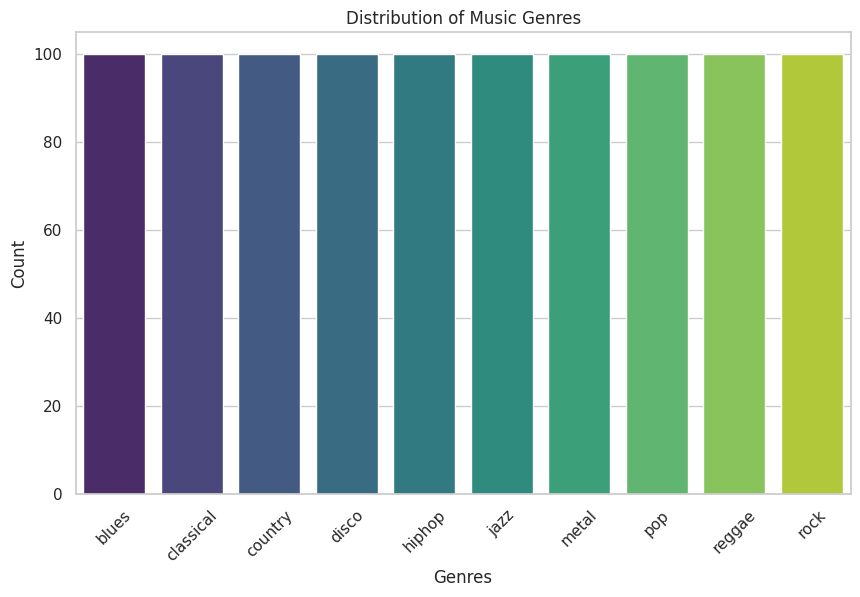

In [5]:
# Visualize genre distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='label', palette='viridis')
plt.title('Distribution of Music Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Our dataset is balanced. Number of smaples for all the classes are same.

In [20]:
# Check the data types before conversion
print("Data types before conversion:")
print(data.dtypes)


Data types before conversion:
filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean               

In [6]:
# Define the column to be converted
label_column = 'label'

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert the 'label' column to numerical values
#data[label_column + '_encoded'] = label_encoder.fit_transform(data[label_column])
data['label'] = label_encoder.fit_transform(data[label_column])

# Check the data types after conversion
print("\nData types after conversion:")
print(data.dtypes)




Data types after conversion:
filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean               

In [35]:
# Optionally, display the first few rows of the updated DataFrame
print("\nUpdated DataFrame:")
print(data.head())



Updated DataFrame:
          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1             

In [7]:
dataset= data.drop(['filename','length'], axis=1)

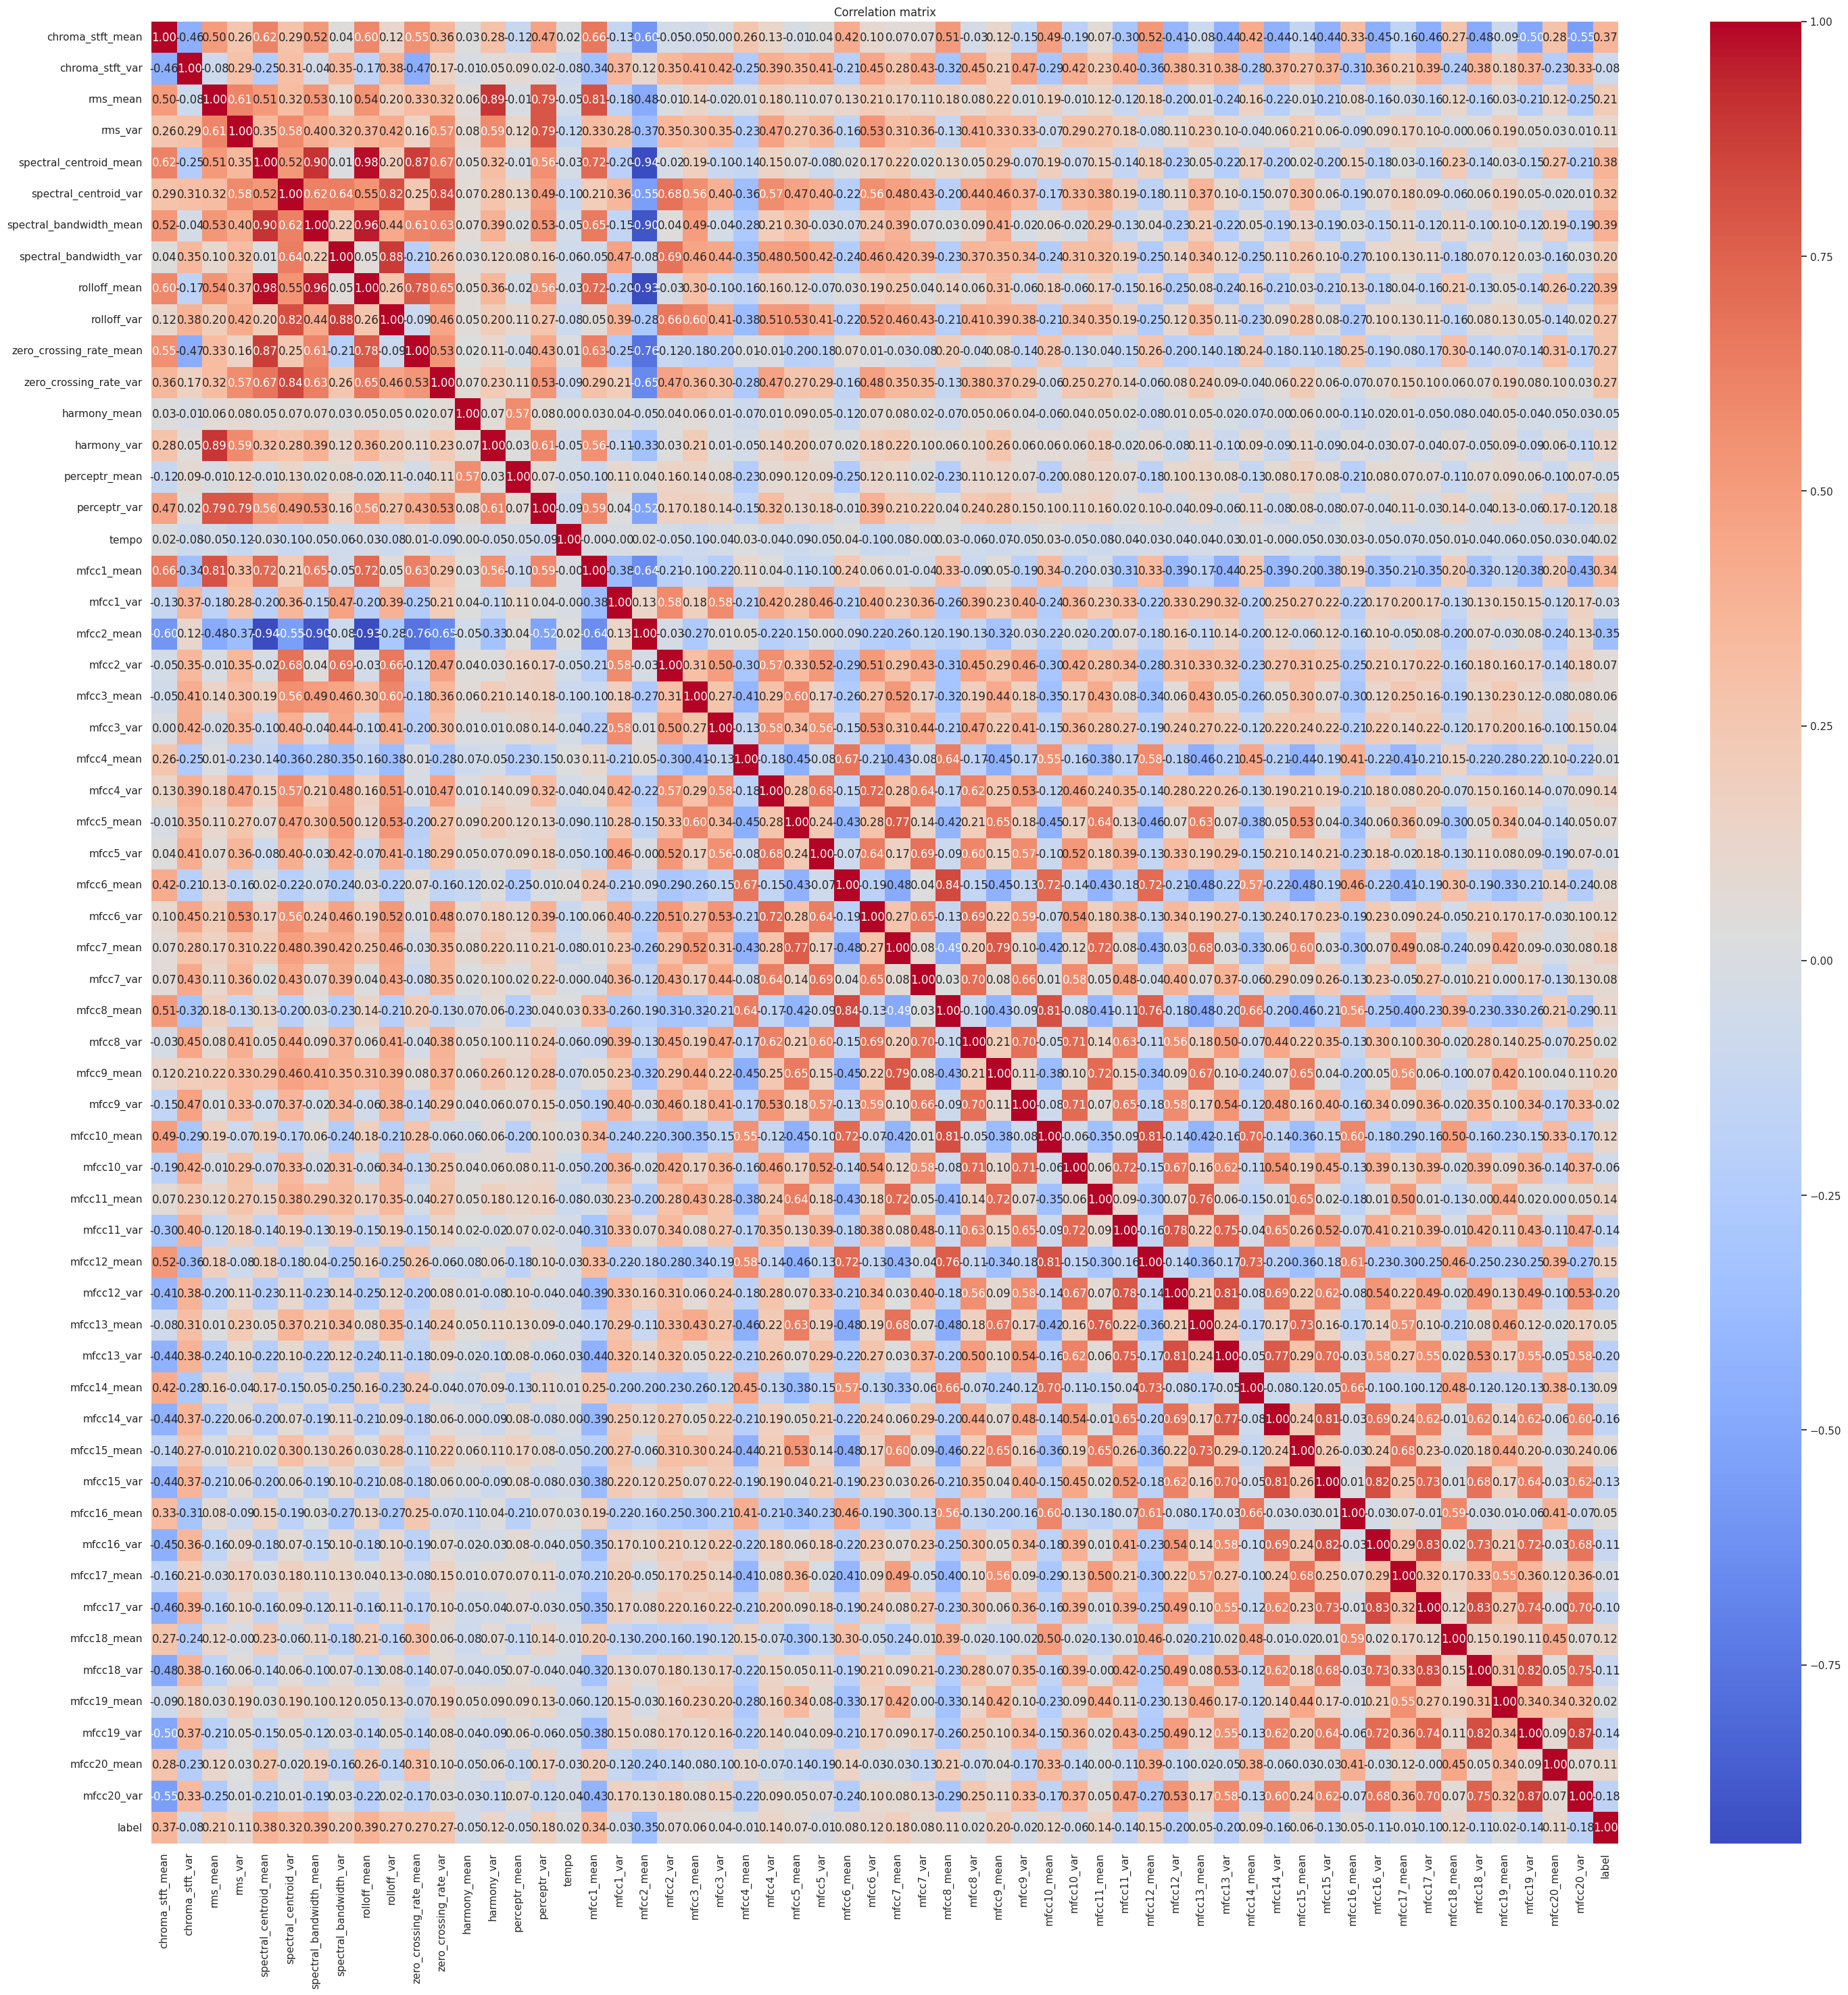

In [77]:
# Compute the correlation matrix of dataset
corr_matrix = dataset.corr()

# Plot the heatmap
plt.figure(figsize=(35, 35))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

MfCC features are highly correlated with each other and causing multycolinearity.

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   length                   1000 non-null   int64  
 1   chroma_stft_mean         1000 non-null   float64
 2   chroma_stft_var          1000 non-null   float64
 3   rms_mean                 1000 non-null   float64
 4   rms_var                  1000 non-null   float64
 5   spectral_centroid_mean   1000 non-null   float64
 6   spectral_centroid_var    1000 non-null   float64
 7   spectral_bandwidth_mean  1000 non-null   float64
 8   spectral_bandwidth_var   1000 non-null   float64
 9   rolloff_mean             1000 non-null   float64
 10  rolloff_var              1000 non-null   float64
 11  zero_crossing_rate_mean  1000 non-null   float64
 12  zero_crossing_rate_var   1000 non-null   float64
 13  harmony_mean             1000 non-null   float64
 14  harmony_var              

In [11]:
dataset.isnull().sum()

length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var                  0
mfcc9_mean                 0
mfcc9_var                  0
mfcc10_mean                0
mfcc10_var                 0
mfcc11_mean                0
mfcc11_var                 0
mfcc12_mean                0
mfcc12_var                 0
mfcc13_mean                0
mfcc13_var                 0
mfcc14_mean                0
mfcc14_var                 0
mfcc15_mean                0
mfcc15_var                 0
mfcc16_mean                0
mfcc16_var                 0
mfcc17_mean                0
mfcc17_var                 0
mfcc18_mean                0
mfcc18_var                 0
mfcc19_mean                0
mfcc19_var                 0
mfcc20_mean                0
mfcc20_var                 0
label                      0
dtype: int64

In [8]:
#mfcc features
mfcc_columns=['mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']
mfcc_data=dataset[mfcc_columns]

In [9]:
# Step 1: features other than MFCC features from the dataset
non_mfcc_columns = dataset.columns.difference(mfcc_columns)
non_mfcc_data = dataset[non_mfcc_columns]

In [14]:
#printing first five rows
mfcc_data.head()

mfcc1_mean    mfcc1_var  mfcc2_mean   mfcc2_var  mfcc3_mean   mfcc3_var  \
0 -113.570648  2564.207520  121.571793  295.913818  -19.168142  235.574432   
1 -207.501694  7764.555176  123.991264  560.259949    8.955127  572.810913   
2  -90.722595  3319.044922  140.446304  508.765045  -29.093889  411.781219   
3 -199.544205  5507.517090  150.090897  456.505402    5.662678  257.161163   
4 -160.337708  5195.291992  126.219635  853.784729  -35.587811  333.792938   

   mfcc4_mean   mfcc4_var  mfcc5_mean   mfcc5_var  ...  mfcc16_mean  \
0   42.366421  151.106873   -6.364664  167.934799  ...     0.752740   
1   35.877647  264.506104    2.907320  279.932922  ...     0.927998   
2   31.684334  144.090317  -13.984504  155.493759  ...     2.451690   
3   26.859079  158.267303    1.771399  268.034393  ...     0.780874   
4   22.148071  193.456100  -32.478600  336.276825  ...    -4.520576   

   mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0   52.420910    -1.690215   36.524071    -0.408979   41.597103    -2.303523   
1   55.356403    -0.731125   60.314529     0.295073   48.120598    -0.283518   
2   40.598766    -7.729093   47.639427    -1.816407   52.382141    -3.439720   
3   44.427753    -3.319597   50.206673     0.636965   37.319130    -0.619121   
4   86.099236    -5.454034   75.269707    -0.916874   53.613918    -4.404827   

   mfcc19_var  mfcc20_mean  mfcc20_var  
0   55.062923     1.221291   46.936035  
1   51.106190     0.531217   45.786282  
2   46.639660    -2.231258   30.573025  
3   37.259739    -3.407448   31.949339  
4   62.910812   -11.703234   55.195160  

[5 rows x 40 columns]

In [16]:
#printing first five rows
non_mfcc_data.head()

chroma_stft_mean  chroma_stft_var  harmony_mean  harmony_var  label  \
0          0.350088         0.088757 -4.529724e-05     0.008172      0   
1          0.340914         0.094980  1.395807e-04     0.005099      0   
2          0.363637         0.085275  2.105576e-06     0.016342      0   
3          0.404785         0.093999  4.583644e-07     0.019054      0   
4          0.308526         0.087841 -1.756129e-05     0.004814      0   

   length  perceptr_mean  perceptr_var  rms_mean   rms_var  rolloff_mean  \
0  661794       0.000008      0.005698  0.130228  0.002827   3805.839606   
1  661794      -0.000178      0.003063  0.095948  0.002373   3550.522098   
2  661794      -0.000019      0.007458  0.175570  0.002746   3042.260232   
3  661794      -0.000014      0.002712  0.141093  0.006346   2184.745799   
4  661794      -0.000010      0.003094  0.091529  0.002303   3579.757627   

    rolloff_var  spectral_bandwidth_mean  spectral_bandwidth_var  \
0  9.015054e+05              2002.449060            85882.761315   
1  2.977893e+06              2039.036516           213843.755497   
2  7.840345e+05              1747.702312            76254.192257   
3  1.493194e+06              1596.412872           166441.494769   
4  1.572978e+06              1748.172116            88445.209036   

   spectral_centroid_mean  spectral_centroid_var       tempo  \
0             1784.165850          129774.064525  123.046875   
1             1530.176679          375850.073649   67.999589   
2             1552.811865          156467.643368  161.499023   
3             1070.106615          184355.942417   63.024009   
4             1835.004266          343399.939274  135.999178   

   zero_crossing_rate_mean  zero_crossing_rate_var  
0                 0.083045                0.000767  
1                 0.056040                0.001448  
2                 0.076291                0.001007  
3                 0.033309                0.000423  
4                 0.101461                0.001954

Mel Frequecy coefficents are showing high corelations among each other and causing multycolinearity. To mitigate multycolinearity we are applying PCA on Mfcc features.

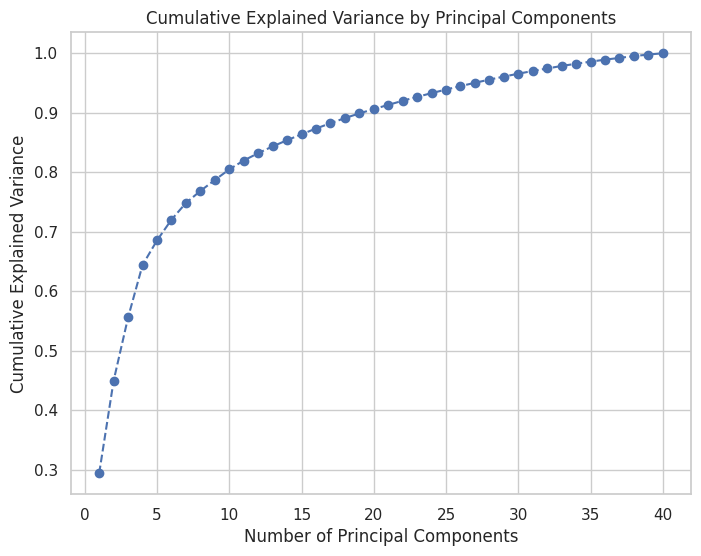

Original Shape: (1000, 40)
Reduced Shape: (1000, 20)


In [10]:
# Standardizing the MFCC features
scaler = StandardScaler()
mfcc_scaled = scaler.fit_transform(mfcc_data)

# Applying PCA
pca = PCA()  # Initialize PCA
mfcc_pca = pca.fit_transform(mfcc_scaled)

# Plotting the explained variance to decide how many components to keep
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Choosing the number of components that explain at least 90% variance
pca = PCA(n_components=0.9)  # This will retain components that explain 90% of the variance
mfcc_pca_reduced = pca.fit_transform(mfcc_scaled)

# Checking the shape of the reduced dataset
print("Original Shape:", mfcc_data.shape)
print("Reduced Shape:", mfcc_pca_reduced.shape)


In [18]:
print(mfcc_pca_reduced)

[[-2.70207638  0.13993109 -0.4598533  ... -0.3738933   0.03767753
   0.43322816]
 [ 1.24392931 -1.37949359  2.36590475 ...  0.11871012 -0.22632302
  -0.15101572]
 [-2.61062283 -0.48142793 -0.12169082 ... -0.27774379  0.44717219
  -0.29045363]
 ...
 [-5.51121665 -1.24233136 -0.2943354  ... -0.20119314 -0.30863738
   0.31440446]
 [-0.8858974  -0.0994238   1.52476788 ... -1.4241271  -0.79315578
  -0.20853433]
 [-1.24179598 -1.43650972  0.55744528 ... -0.38556058 -0.28247346
  -0.63023227]]


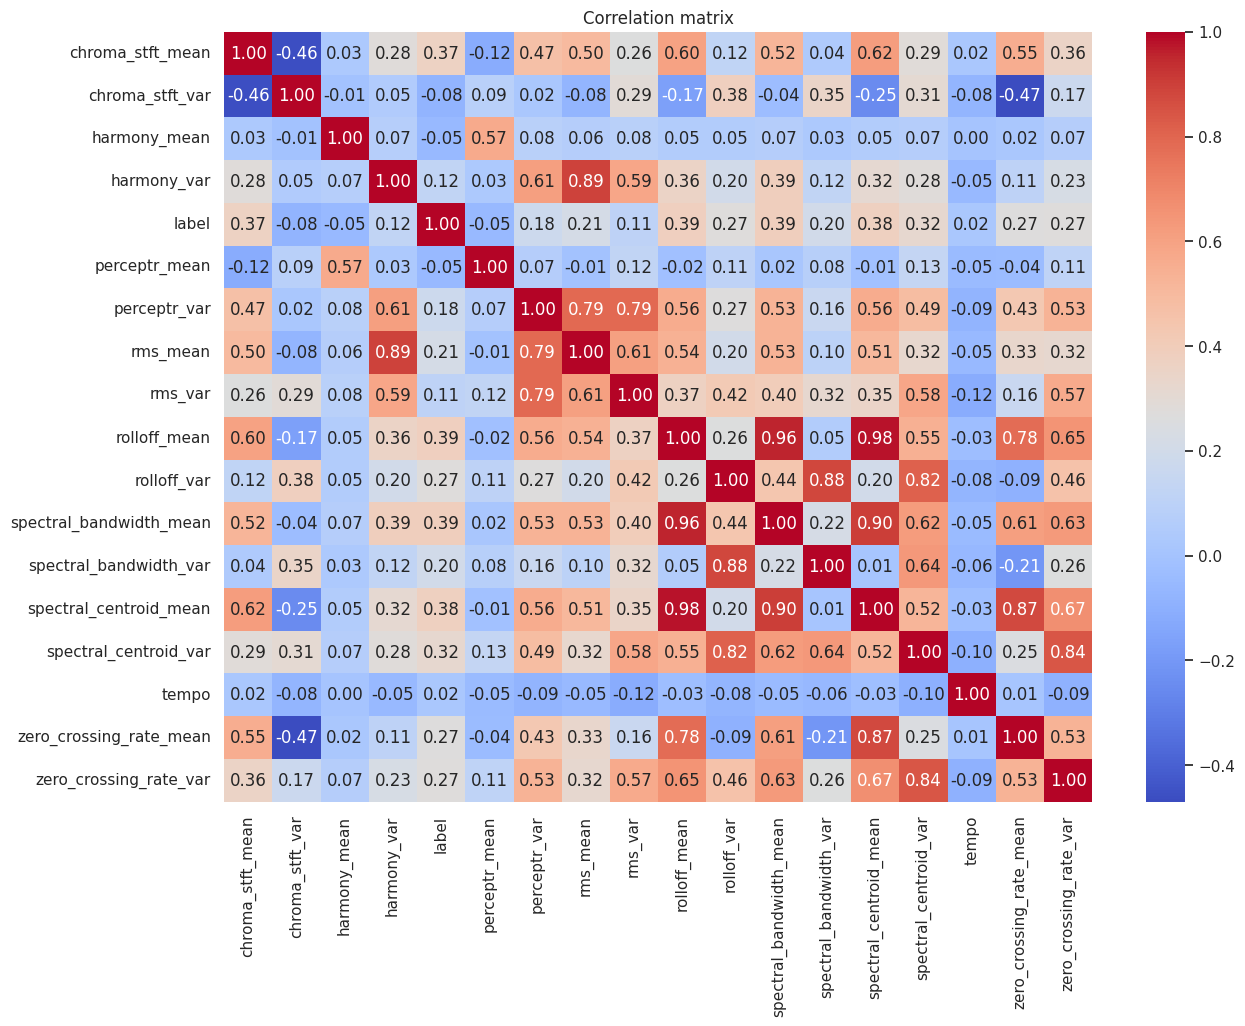

In [143]:
# Compute the correlation matrix for non_mfcc_data
corr_matrix = non_mfcc_data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

From corelation matrix we can see that  'chroma_stft_mean','spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean','rolloff_mean', 'zero_crossing_rate_mean' and 'zero_crossing_rate_var' are highly corelated to the dependent varaible 'label'. These features are playing importnt role in predicting the label.

From the corelation matrix we can see that features 'Perceptr_var','rms_var','rolloff_mean','spectral_bandwidth_mean','spectral_centroid_mean','spectral_centroid_var','zero_crossing_rate_mean' and 'zero_crossing_rate_var'are showing high correlation with each other and causing multycolinearity. To mitigate multycolinearity we will be droping the features causing multycolinearity.

In [11]:
#dropping the features causing multycolinearity
remaining_data= non_mfcc_data.drop(['zero_crossing_rate_mean', 'zero_crossing_rate_var','spectral_centroid_var','spectral_centroid_mean','spectral_bandwidth_mean','rolloff_mean','rms_var','perceptr_var','harmony_var','perceptr_mean', 'rolloff_var'], axis=1)

In [108]:
remaining_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   chroma_stft_mean        1000 non-null   float64
 1   chroma_stft_var         1000 non-null   float64
 2   harmony_mean            1000 non-null   float64
 3   label                   1000 non-null   int64  
 4   rms_mean                1000 non-null   float64
 5   spectral_bandwidth_var  1000 non-null   float64
 6   tempo                   1000 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 54.8 KB


In [12]:
#Combining PCA components and Temporal features
# Step 1: Convert the PCA-reduced MFCC features (NumPy array) to a DataFrame
mfcc_pca_reduced_df = pd.DataFrame(mfcc_pca_reduced, columns=[f'PCA_{i+1}' for i in range(mfcc_pca_reduced.shape[1])])

# Step 2: Reset index for both DataFrames to match them correctly
remaining_data.reset_index(drop=True, inplace=True)
mfcc_pca_reduced_df.reset_index(drop=True, inplace=True)

# Step 3: Concatenate the two DataFrames column-wise
final_features = pd.concat([remaining_data, mfcc_pca_reduced_df], axis=1)

# Step 4: Check the final dataset
print("Final features shape:", final_features.shape)
print(final_features.head())

Final features shape: (1000, 27)
   chroma_stft_mean  chroma_stft_var  harmony_mean  label  rms_mean  \
0          0.350088         0.088757 -4.529724e-05      0  0.130228   
1          0.340914         0.094980  1.395807e-04      0  0.095948   
2          0.363637         0.085275  2.105576e-06      0  0.175570   
3          0.404785         0.093999  4.583644e-07      0  0.141093   
4          0.308526         0.087841 -1.756129e-05      0  0.091529   

   spectral_bandwidth_var       tempo     PCA_1     PCA_2     PCA_3  ...  \
0            85882.761315  123.046875 -2.702076  0.139931 -0.459853  ...   
1           213843.755497   67.999589  1.243929 -1.379494  2.365905  ...   
2            76254.192257  161.499023 -2.610623 -0.481428 -0.121691  ...   
3           166441.494769   63.024009  0.044792  1.228429  0.519358  ...   
4            88445.209036  135.999178  0.928520 -1.202347 -0.489320  ...   

     PCA_11    PCA_12    PCA_13    PCA_14    PCA_15    PCA_16    PCA_17  \
0 -0.449

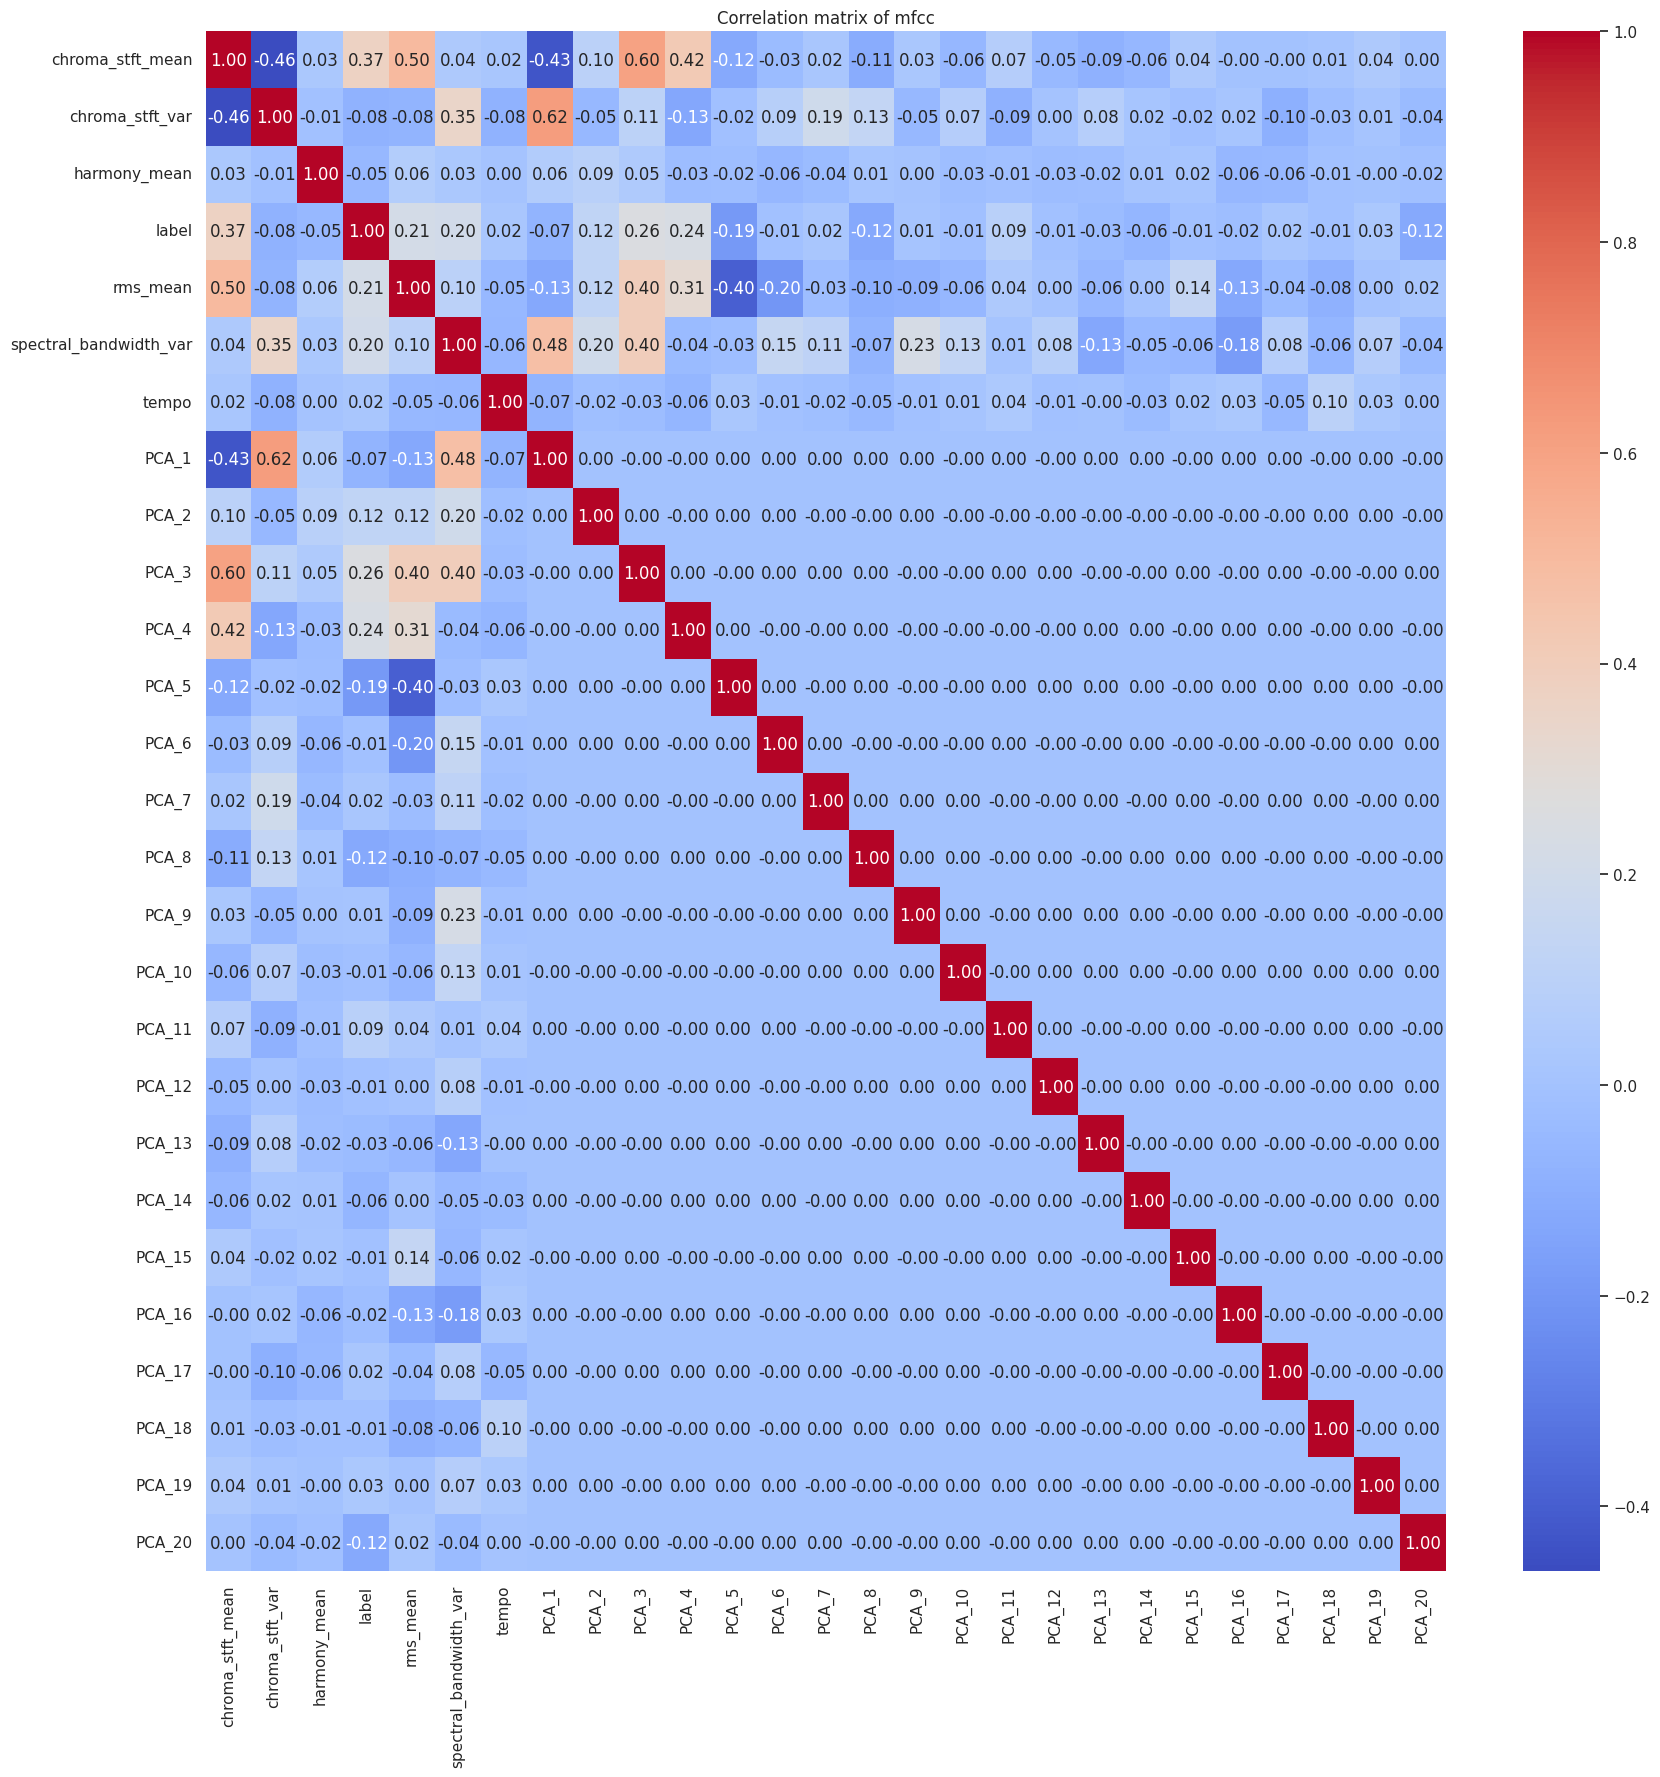

In [178]:
# Compute the correlation matrix for final_features
corr_matrix = final_features.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix of mfcc")
plt.show()

In [225]:
final_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   chroma_stft_mean        1000 non-null   float64
 1   chroma_stft_var         1000 non-null   float64
 2   harmony_mean            1000 non-null   float64
 3   label                   1000 non-null   int64  
 4   rms_mean                1000 non-null   float64
 5   spectral_bandwidth_var  1000 non-null   float64
 6   tempo                   1000 non-null   float64
 7   PCA_1                   1000 non-null   float64
 8   PCA_2                   1000 non-null   float64
 9   PCA_3                   1000 non-null   float64
 10  PCA_4                   1000 non-null   float64
 11  PCA_5                   1000 non-null   float64
 12  PCA_6                   1000 non-null   float64
 13  PCA_7                   1000 non-null   float64
 14  PCA_8                   1000 non-null   f

In [20]:
# Split the dataset (final_features) into features (X) and target labels (y)
X = final_features.drop('label', axis=1).values  # 'label' is the target column
y = final_features['label'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# First train-test split (80% train, 20% test)
train_features, test_features, train_target, test_target = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Second split: train-validation split (10% of the train data is used for validation)
train_features, val_features, train_target, val_target = train_test_split(
    train_features, train_target, test_size=0.1, random_state=42
)


In [50]:
# Create a custom dataset class for tabular data
class TabularDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, idx):
        return torch.tensor(self.features[idx], dtype=torch.float32), torch.tensor(self.targets[idx], dtype=torch.long)

# Create datasets and loaders
train_dataset = TabularDataset(train_features, train_target)
val_dataset = TabularDataset(val_features, val_target)
test_dataset = TabularDataset(test_features, test_target)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [51]:
# Define the Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=512, nhead=16, num_layers=3):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead), num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add a sequence dimension
        x = self.embedding(x)
        x = self.transformer(x)
        x = x.mean(dim=1)  # Global average pooling
        return self.fc(x)

# Initialize model, optimizer, and criterion
input_dim = train_features.shape[1]
num_classes = len(set(train_target))
model = TransformerModel(input_dim=input_dim, num_classes=num_classes)

optimizer = optim.AdamW(model.parameters(), lr=0.00009)
criterion = nn.CrossEntropyLoss()

# Scheduler and Early Stopping Settings
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)
patience = 5  # Early stopping patience
best_val_loss = float('inf')
early_stopping_counter = 0

# Training loop with early stopping and validation
epochs = 40

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)

    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs, val_labels).item()

    avg_val_loss = val_loss / len(val_loader)
    print(f'Epoch {epoch + 1}, Training Loss: {avg_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

    # Step the scheduler
    scheduler.step(avg_val_loss)

    # Early stopping logic
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        early_stopping_counter = 0  # Reset counter if we get a better loss
        # Save the best model
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        early_stopping_counter += 1

    if early_stopping_counter >= patience:
        print("Early stopping triggered due to no improvement in validation loss.")
        break


Epoch 1, Training Loss: 1.6990, Validation Loss: 1.1425
Epoch 2, Training Loss: 0.9260, Validation Loss: 0.9884
Epoch 3, Training Loss: 0.7383, Validation Loss: 0.9386
Epoch 4, Training Loss: 0.6286, Validation Loss: 1.0322
Epoch 5, Training Loss: 0.5203, Validation Loss: 0.8926
Epoch 6, Training Loss: 0.4243, Validation Loss: 0.8878
Epoch 7, Training Loss: 0.3568, Validation Loss: 0.8930
Epoch 8, Training Loss: 0.2817, Validation Loss: 0.9508
Epoch 9, Training Loss: 0.2449, Validation Loss: 0.8475
Epoch 10, Training Loss: 0.2070, Validation Loss: 0.9507
Epoch 11, Training Loss: 0.1585, Validation Loss: 0.9194
Epoch 12, Training Loss: 0.1392, Validation Loss: 0.9012
Epoch 13, Training Loss: 0.1181, Validation Loss: 0.9887
Epoch 14, Training Loss: 0.0878, Validation Loss: 0.9505
Early stopping triggered due to no improvement in validation loss.


In [52]:
# Load the best model before testing
model.load_state_dict(torch.load('best_model.pth'))

<All keys matched successfully>

In [53]:
# Testing loop
model.eval()
correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Store predictions and labels for metric calculation
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Convert lists to arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions, average='weighted')
f1 = f1_score(all_labels, all_predictions, average='weighted')

# Print the metrics
print(f'Accuracy of the model on the test set: {100 * correct / total:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy of the model on the test set: 70.00%
Precision: 0.7143
F1 Score: 0.6980


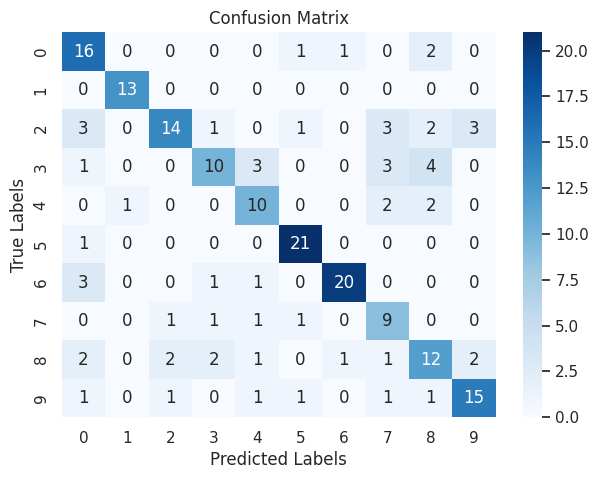

In [54]:
# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()